**Importing all the basic modules**

In [10]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv (r"C:\Users\Atik\Default_Fin.csv")
df.head

<bound method NDFrame.head of       Index  Employed  Bank Balance  Annual Salary  Defaulted?
0         1         1       8754.36      532339.56           0
1         2         0       9806.16      145273.56           0
2         3         1      12882.60      381205.68           0
3         4         1       6351.00      428453.88           0
4         5         1       9427.92      461562.00           0
...     ...       ...           ...            ...         ...
9995   9996         1       8538.72      635908.56           0
9996   9997         1       9095.52      235928.64           0
9997   9998         1      10144.92      703633.92           0
9998   9999         1      18828.12      440029.32           0
9999  10000         0       2411.04      202355.40           0

[10000 rows x 5 columns]>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [16]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


***WHEN YOU HAVE ONE CONDITION***


np.where ( logical_statement, value_if_true, value_if_false)

In [17]:
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


***IF YOU HAVE MORE THAN 2 CONDITIONS***

np.select(conditions, choices , default = 'default value')

## WHAT IS THE NUMBER OF PEOPLE WHO WILL BE GIVEN GRACE OF EXACTLY 15 DAYS ?

In [18]:
# Making a column which states whether the loan will be granted or not 
# Based on the conditions given in the question (Bank Balance > 5K, Annual Salary > 100K)

conditions = [
    (df['Defaulted?']==0),
    (df['Bank Balance']>5000) & (df['Annual Salary'] > 100000) & (df['Defaulted?'] == 1) & (df['Employed'] == 1),
    (df['Bank Balance']>5000) & (df['Annual Salary'] > 100000) & (df['Defaulted?'] == 1) & (df['Employed'] == 0)
] ##
choices = ['N/A','Granted', 'More than 15']
df['Exactly 15D Grace'] = np.select(conditions , choices , default = 'Not Granted')

In [19]:
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,Exactly 15D Grace
0,1,1,8754.36,532339.56,0,N/A
1,2,0,9806.16,145273.56,0,N/A
2,3,1,12882.60,381205.68,0,N/A
3,4,1,6351.00,428453.88,0,N/A
4,5,1,9427.92,461562.00,0,N/A
...,...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0,N/A
9996,9997,1,9095.52,235928.64,0,N/A
9997,9998,1,10144.92,703633.92,0,N/A
9998,9999,1,18828.12,440029.32,0,N/A


In [20]:
sum(df['Exactly 15D Grace']=='Granted')

206

In [21]:
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,Exactly 15D Grace
0,1,1,8754.36,532339.56,0,N/A
1,2,0,9806.16,145273.56,0,N/A
2,3,1,12882.60,381205.68,0,N/A
3,4,1,6351.00,428453.88,0,N/A
4,5,1,9427.92,461562.00,0,N/A
...,...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0,N/A
9996,9997,1,9095.52,235928.64,0,N/A
9997,9998,1,10144.92,703633.92,0,N/A
9998,9999,1,18828.12,440029.32,0,N/A


## MAXIMUM FINE WHICH CAN BE LEVIED IN 15 DAYS

In [22]:
# Making a column which states the Bank Balance of each defaulter not eligible for grace after 15 days fine 
# Balance after 15 days of fine = (bank balance *(0.975^15))
#because each day the balance will become 97.5% of what it was.

df['Balance after 15D fine'] = np.where (df['Exactly 15D Grace'] == 'Not Granted' ,(df['Bank Balance']*(0.975**15)),(df['Bank Balance']))

In [23]:
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,Exactly 15D Grace,Balance after 15D fine
0,1,1,8754.36,532339.56,0,N/A,8754.36
1,2,0,9806.16,145273.56,0,N/A,9806.16
2,3,1,12882.60,381205.68,0,N/A,12882.60
3,4,1,6351.00,428453.88,0,N/A,6351.00
4,5,1,9427.92,461562.00,0,N/A,9427.92
...,...,...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0,N/A,8538.72
9996,9997,1,9095.52,235928.64,0,N/A,9095.52
9997,9998,1,10144.92,703633.92,0,N/A,10144.92
9998,9999,1,18828.12,440029.32,0,N/A,18828.12


In [24]:
# Making a column which states the fine of 15 days of each defaulter who is not eligible for grace
# 15 days fine = initial bank balance - Balance after 15D fine

df['15D fine'] = np.where (df['Exactly 15D Grace'] == 'Not Granted' , (df['Bank Balance'] -  df['Balance after 15D fine']),0)


In [25]:
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,Exactly 15D Grace,Balance after 15D fine,15D fine
0,1,1,8754.36,532339.56,0,N/A,8754.36,0.0
1,2,0,9806.16,145273.56,0,N/A,9806.16,0.0
2,3,1,12882.60,381205.68,0,N/A,12882.60,0.0
3,4,1,6351.00,428453.88,0,N/A,6351.00,0.0
4,5,1,9427.92,461562.00,0,N/A,9427.92,0.0
...,...,...,...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0,N/A,8538.72,0.0
9996,9997,1,9095.52,235928.64,0,N/A,9095.52,0.0
9997,9998,1,10144.92,703633.92,0,N/A,10144.92,0.0
9998,9999,1,18828.12,440029.32,0,N/A,18828.12,0.0


In [26]:
max(df['15D fine'])

0.0

In [27]:
sum(df['Exactly 15D Grace']=='NotGranted')

0

In [28]:
#We can see that there are no person in the database which has not received the grace period of 15 days. 
#Hence, the maximum fine that can be collected by the bank in that period is 0.

## TOTAL AMOUNT BEING GENERATED BY BANK IN PART OF FINE

In [29]:
# Making a column which states the Bank Balance of each defaulter's fine 
# Balance after 15 days of fine = (bank balance *(0.975^15))
#because each day the balance will become 97.5% of what it was.

df['fine of each day'] = np.where (df['Exactly 15D Grace'] != 'N/A' ,(df['Bank Balance']*(0.975)),0)

In [30]:
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,Exactly 15D Grace,Balance after 15D fine,15D fine,fine of each day
0,1,1,8754.36,532339.56,0,N/A,8754.36,0.0,0.0
1,2,0,9806.16,145273.56,0,N/A,9806.16,0.0,0.0
2,3,1,12882.60,381205.68,0,N/A,12882.60,0.0,0.0
3,4,1,6351.00,428453.88,0,N/A,6351.00,0.0,0.0
4,5,1,9427.92,461562.00,0,N/A,9427.92,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0,N/A,8538.72,0.0,0.0
9996,9997,1,9095.52,235928.64,0,N/A,9095.52,0.0,0.0
9997,9998,1,10144.92,703633.92,0,N/A,10144.92,0.0,0.0
9998,9999,1,18828.12,440029.32,0,N/A,18828.12,0.0,0.0


In [31]:
sum(df['fine of each day'])

6809687.468999999

## PLOT OF DIFFERENCE BETWEEN ELIGIBLE AND NON ELIGIBLE PEOPLE FOR GRACE

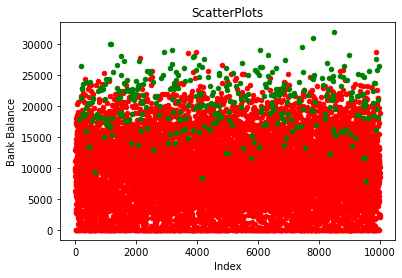

In [32]:
#Note - Since, all the defaulter are eligible for grace period. We are essentially comparing defaulters with non defaulters only.

#Get current axis
ax = plt.gca()

# scatter plot for People not eligible for grace period
df[df["Exactly 15D Grace"] == "N/A"].plot(kind = 'scatter',
x = 'Index',
y = 'Bank Balance',
color = 'red',ax = ax)

# scatter plot for people eligible for grace period
df[df["Exactly 15D Grace"] != "N/A"].plot(kind = 'scatter',
x = 'Index' ,                                          
y = 'Bank Balance',
color = 'green',ax = ax)

# set the title
plt.title('ScatterPlots')

# show the plot
plt.show()



## Median difference of eligible vs original value

In [33]:
#We use median function to find the median of all the values of Bank Balance
df['Bank Balance'].median()

9883.619999999999

In [34]:
#We use loc function to locate all the bank balances of people who were given grace periods on default.
#df.loc[df[column_name]_Condition , Column_Values_Required]

df.loc[df["Exactly 15D Grace"] != "N/A", 'Bank Balance'].median()

21469.08

In [35]:
#Subtracting median of eligible people vs ineligible people.

df.loc[df["Exactly 15D Grace"] != "N/A", 'Bank Balance'].median() - df['Bank Balance'].median()

11585.460000000003

## CHANGES IN ANNUAL INCOME

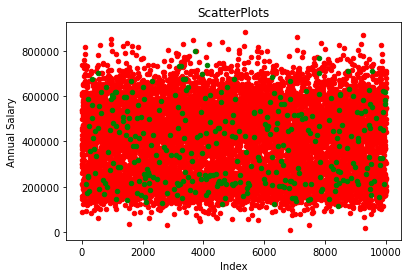

In [36]:
#Note - Since, all the defaulter are eligible for grace period. We are essentially comparing defaulters with non defaulters only.

#Get current axis
ax = plt.gca()

# scatter plot for People not eligible for grace period
df[df["Exactly 15D Grace"] == "N/A"].plot(kind = 'scatter',
x = 'Index',
y = 'Annual Salary',
color = 'red',ax = ax)

# scatter plot for people eligible for grace period
df[df["Exactly 15D Grace"] != "N/A"].plot(kind = 'scatter',
x = 'Index' ,                                          
y = 'Annual Salary',
color = 'green',ax = ax)

# set the title
plt.title('ScatterPlots')

# show the plot
plt.show()
